In [1]:
from qiskit import Aer, QuantumCircuit, execute
from qiskit.visualization import plot_histogram

In [2]:
qd=QuantumCircuit(3,3)
init_st=[1/2**.5,1/2**.5]
for i in range(3):
    qd.initialize(init_st,i)
    qd.measure(i,i)
qd.draw()

┌─────────────────────────────┐┌─┐      
q_0: ┤ Initialize(0.70711,0.70711) ├┤M├──────
     ├─────────────────────────────┤└╥┘┌─┐   
q_1: ┤ Initialize(0.70711,0.70711) ├─╫─┤M├───
     ├─────────────────────────────┤ ║ └╥┘┌─┐
q_2: ┤ Initialize(0.70711,0.70711) ├─╫──╫─┤M├
     └─────────────────────────────┘ ║  ║ └╥┘
c: 3/════════════════════════════════╩══╩══╩═
                                     0  1  2

In [3]:
qc=Aer.get_backend("statevector_simulator")


In [4]:
def roll_dice():
    r=tuple(execute(qd,qc).result().get_counts())[0][::-1]
    val=0
    for i in range(3):
        val+=int(r[i])*2**i
    if val not in (1,2,3,4,5,6):
        val=roll_dice()
    return val
        

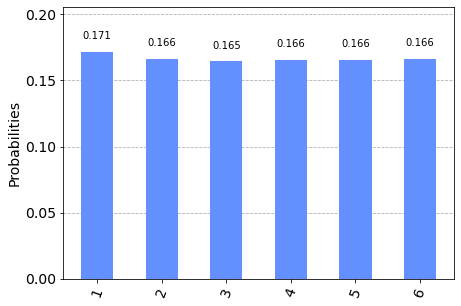

In [5]:
graph={"1":0,"2":0,"3":0,"4":0,"5":0,"6":0}
for i in range(5000):
    r=roll_dice()
    graph[str(r)]+=1

plot_histogram(graph)